In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
import pandas as pd

In [17]:
df2=pd.read_csv('engineered_2yr.csv')

In [18]:
df2.describe()

,id,completion_rate__less_than_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income,n_size,n_cost,n_m_hh_income,pt25,pellsq,twoyrdsq,incost
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,192202.379048,0.246557,0.094784,0.490022,0.336218,0.372383,0.198574,0.602821,0.318314,0.124621,0.172067,0.468360,0.258165,0.096744,0.085970,0.546206,0.162352,0.150390,0.018450,0.087323
std,68740.489244,0.104458,0.108343,0.172550,0.183235,0.108366,0.164393,0.077588,0.087815,0.054085,0.045227,0.067542,0.119993,0.108343,0.026554,0.095795,0.082304,0.083114,0.012502,0.066953
min,100760.000000,0.060600,0.000000,0.000000,0.000000,0.087600,0.000000,0.363600,0.082400,0.000000,0.056000,0.284871,0.000000,0.001959,0.037246,0.340101,0.000000,0.007674,0.000000,0.000000
25%,154110.000000,0.165800,0.026671,0.369500,0.206815,0.298300,0.058400,0.548800,0.261000,0.098000,0.143000,0.421677,0.173068,0.028631,0.067217,0.478269,0.099308,0.088983,0.009604,0.031597
50%,184995.000000,0.236200,0.059339,0.513500,0.359502,0.367900,0.177100,0.599800,0.314600,0.126000,0.166000,0.469498,0.245812,0.061299,0.089345,0.536344,0.160718,0.135350,0.015876,0.074493
75%,213525.000000,0.302900,0.127361,0.620900,0.453866,0.451300,0.297300,0.650000,0.378700,0.160000,0.201000,0.515344,0.333122,0.129320,0.103020,0.606047,0.217020,0.203672,0.025600,0.126621
max,487320.000000,0.692700,0.998041,0.853900,0.873919,0.641200,0.830500,0.857100,0.567000,0.232000,0.292000,0.640339,0.586397,1.000000,0.163894,0.808248,0.446021,0.411137,0.053824,0.358083


In [11]:
df4=pd.read_csv('engineered_4yr.csv')

In [12]:
df4.describe()

,id,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income,pt25,pell_twoyear,incost,pellsq,twoyrdsq
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,207079.243395,0.512205,0.048505,0.143525,0.377736,0.385348,0.563682,0.738958,0.224541,0.063237,0.074953,0.335332,0.308029,0.056903,0.028705,0.131250,0.175828,0.005975
std,89276.531114,0.204163,0.077559,0.162999,0.241605,0.165379,0.196830,0.144208,0.225324,0.044470,0.050710,0.107505,0.115274,0.117150,0.031143,0.117867,0.148596,0.008854
min,100654.000000,0.021600,0.000000,0.000000,0.000000,0.000000,0.000000,0.090900,0.000000,0.000000,0.000000,0.088670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154058.500000,0.364200,0.008219,0.030250,0.159347,0.267500,0.449450,0.666700,0.061200,0.033000,0.038000,0.265674,0.233988,0.001653,0.009524,0.042160,0.071556,0.001089
50%,190725.000000,0.511600,0.018878,0.090800,0.317277,0.366700,0.589000,0.755000,0.159100,0.054000,0.065000,0.340591,0.299742,0.012947,0.019294,0.090230,0.134469,0.002916
75%,218968.500000,0.655400,0.052344,0.198800,0.552038,0.480350,0.711950,0.833550,0.295300,0.080000,0.100000,0.401697,0.388098,0.052185,0.034777,0.183643,0.230736,0.006400
max,489937.000000,0.982100,0.999940,1.000000,0.978803,0.958600,1.000000,1.000000,0.980800,0.312000,0.331000,0.850909,0.603440,0.771248,0.296806,0.525986,0.918914,0.097344


In [13]:
#t-test of the mean of completion rate of both samples
stats.ttest_ind(df2.completion_rate__less_than_4yr_150nt, df4.completion_rate_4yr_150nt)

Ttest_indResult(statistic=-28.721383222994984, pvalue=2.5931738673359537e-155)

In [14]:
#Multi regression with cost, median income, pell squared, 25 or older share,first gen share, pell grant rate, retention rate FT, income*cost as predictors
f='completion_rate_4yr_150nt~cost+median_hh_income+pellsq+share_25_older+share_firstgeneration+pell_grant_rate+three_yr_default_rate+retention_rate_full_time+incost'
model=smf.ols(formula=f, data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     completion_rate_4yr_150nt   R-squared:                       0.716
Model:                                   OLS   Adj. R-squared:                  0.714
Method:                        Least Squares   F-statistic:                     494.7
Date:                       Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                               11:44:55   Log-Likelihood:                 1421.3
No. Observations:                       1779   AIC:                            -2823.
Df Residuals:                           1769   BIC:                            -2768.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.3614      0.032     11.316      0.000       0.299       0.424
cost                         0.2287      0.039      5.908      0.000       0.153       0.305
median_hh_income             0.2982      0.044      6.725      0.000       0.211       0.385
pellsq                       0.6606      0.078      8.511      0.000       0.508       0.813
share_25_older              -0.1387      0.016     -8.865      0.000      -0.169      -0.108
share_firstgeneration       -0.1480      0.040     -3.682      0.000      -0.227      -0.069
pell_grant_rate             -0.7197      0.075     -9.567      0.000      -0.867      -0.572
three_yr_default_rate       -0.7694      0.079     -9.782      0.000      -0.924      -0.615
retention_rate_full_time     0.4191      0.024     17.214      0.000       0.371       0.467
incost                      -0.2860      0.101     -2.833      0.005      -0.484      -0.088
==============================================================================
Omnibus:                      224.384   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2421.295
Skew:                           0.031   Prob(JB):                         0.00
Kurtosis:                       8.715   Cond. No.                         70.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df2.head()

,id,name,completion_rate__less_than_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,...,three_yr_default_rate,share_firstgeneration,median_hh_income,n_size,n_cost,n_m_hh_income,pt25,pellsq,twoyrdsq,incost
0,100760,Central Alabama Community College,0.2153,0.023242,0.3733,0.447969,0.5109,0.3234,0.6173,0.2630,...,0.272,0.549676,0.132598,0.025202,0.102165,0.445960,0.098178,0.261019,0.041616,0.059400
1,101028,Chattahoochee Valley Community College,0.1108,0.022094,0.3961,0.431455,0.5790,0.2697,0.5096,0.3604,...,0.170,0.430267,0.168896,0.024053,0.099772,0.474938,0.142754,0.335241,0.009216,0.072871
2,101143,Enterprise State Community College,0.1500,0.020962,0.3950,0.447969,0.4559,0.1738,0.5529,0.2896,...,0.222,0.421892,0.136187,0.022922,0.102165,0.448825,0.114392,0.207845,0.031329,0.061007
3,101161,Coastal Alabama Community College,0.2401,0.068798,0.3939,0.447969,0.4406,0.4779,0.5019,0.2598,...,0.201,0.435120,0.234139,0.070758,0.102165,0.527025,0.102335,0.194128,0.014161,0.104887
4,101286,George C Wallace Community College-Dothan,0.2072,0.063984,0.4974,0.440105,0.5274,0.0000,0.6072,0.3422,...,0.166,0.485154,0.120367,0.065944,0.101026,0.436195,0.170210,0.278151,0.000000,0.052974


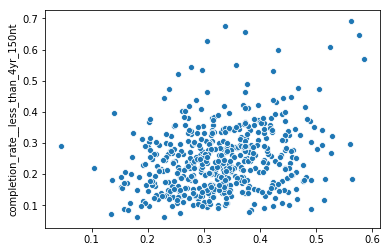

In [19]:
#Scatterplot of predicted values vs actual completion rate
y_pred=model.predict(df2)
sns.scatterplot(x=y_pred, y=df2.completion_rate__less_than_4yr_150nt)